# COGS 108 - Final Project

## Permission

Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

[ x ] YES - make available
[ ] NO - keep private

# Names

- Vincent Santos
- Campbell Moco
- Mary Mei Longano
- Zara Nazir
- Isabella Gonzalez 

## Background and Prior Work

Since the onset of the COVID-19 pandemic, the general public has been polarized by the politicization of a global health crisis. Social media plays a major role in leading the general sentiment on pressing issues such as the Coronavirus. More apparently, the world has visualized this social disparity by observing the rate of vaccination. In a recent study, it was found that almost half of Americans get their news about COVID-19 vaccines from social media (Pew Research). It is important to note that a significant portion of the U.S. seeks insight on sociological and scientific topics by way of sensitized and unregulated platforms. 

  We focus primarily on the social media platform, Twitter. Twitter is a source of online news and social networking with around 200 million users worldwide and 34 million active U.S. users (Statistica). It is most commonly used to express quick and engaging bites about ongoing social matters, such as the pandemic. Twitter can be used as a powerful tool over the public–as we’ve seen by the former U.S. President rallying support and rising commotion through his tweets. One study used an algorithm to evaluate 1 million tweets related to the vaccine and discovered that the conversations were primarily influenced by political and nonmedical users (NIH). This implies that the vaccine conversations on twitter are sparked by personal and political stances, generally leaving the professional medical community out of it. Consequently, this has led to a unique relationship between social media activity, public sentiment, and its impact on the pandemic. 
    
  Prior to the pandemic, a study conducted by Valdes et al analyzed over a million tweets from June 2011 to April 2019 in order to determine overall sentiment towards general vaccinations. The results showed a drop in neutral opinionated vaccination tweets and an increase in positive or negative vaccination tweets over time. Focusing on COVID-19, results from study conducted by Hussein et al displayed higher positive and negative sentiments compared to neutral sentiment. The study used natural language processing and deep learning algorithms in order to analyze over 300,000 social media posts including facebook and twitter. The prior study allowed us to want to further research and develop a question regarding the impact of vaccination sentiment due to social media. Our team is looking to explore if twitter sentiment has any relationship with vaccination rates.   

References (include links):
- https://www.pewresearch.org/fact-tank/2021/08/24/about-four-in-ten-americans-say-social-media-is-an-important-way-of-following-covid-19-vaccine-news/
- https://pubmed.ncbi.nlm.nih.gov/33890838/ 
- https://www.statista.com/statistics/970911/monetizable-daily-active-twitter-users-in-the-united-states/ 
- https://www.mdpi.com/2076-393X/9/1/28/htm 
- https://www.jmir.org/2021/4/e26627 


<a id='research_question'></a>
# Research Question

Is there any relationship between twitter vaccine sentiment and vaccination rates within the United States? 

# The Data

The first data set collected was obtained from the CDC and is titled "COVID-19 Vaccinations in the United States, Jurisdiction". This allowed us to look at multiple vaccination rate and distribution variables. The second data set was collected from kaggle and is titled "COVID-19 All Vaccines Tweets", this file contained tweets containing specific key words relating to Covid 19 vaccinations, each observation contained information about the tweet such as the user, location, date, etc. Due to time constraints and the immense amount of data there was per file, and because we wanted to do a sentiment analysis as well, we condensed our data frame to facilitate this. 

# Hypothesis

Although at first our goal was to see if twitter sentiment influenced vaccination rates, upon further research we realized that due to the nature of the pandemic and the increasing requirements of vaccinations that have come with it, that vaccination rates would increase throughout time regardless of twitter sentiment. So instead we want to observe if the vaccination rates affect twitter sentiment. The null hypothesis is that vaccination rates have no effect on twitter sentiment, the alternative hypothesis is that vaccination rates do have an effect on twitter sentiment. 

# Setup

In order to analyze the sentiment of tweets we will be using the vaderSentiment python package that has built in functions that provide the sentiment of each individual tweet. vaderSentiment also has a lexicon catered specifically for social media posts that aids in determining the polarity of each tweet.

In [44]:
pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


We will be using various python packages that will assist in cleaning the data, plotting the results, and setting up helper functions for sentiment analysis

In [45]:
# creating data frames
import pandas as pd
import numpy as np

# ased in plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import re
from datetime import date

# packages for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind

# used for ignoring certain warnings
import warnings
warnings.filterwarnings('ignore')

# initializing maing data frames
tweets = pd.read_csv('vaccination_tweets.csv')
vaccine_rates= pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')

There will be two ways sentiment analysis will be conducted. One way is to return the compound sentiment score returned by our SentimentIntensityAnalyzer object that determines how positive or negative a tweet is. The alternate way of analyzing tweet sentiment is checking to see if the compound score is positive or negative, and labeling each tweet as either 1 as positive, -1 as negative, and 0 as neutral.

In [46]:
sid = SentimentIntensityAnalyzer() # initializing sentiment analyzer object

# finding actual value of sentiment
def sentimentOfTweet(tweet):
    sentiment_dict = sid.polarity_scores(tweet)
    
    # decide sentiment as positive, negative and neutral
    return sentiment_dict['compound']

# finding categorical value of sentiment (positive, neutral, negative)
def sentimentOfTweetAlt(tweet):
    sentiment_dict = sid.polarity_scores(tweet)
    
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] > 0:
        return 1
    elif sentiment_dict['compound'] < 0:
        return -1
    else:
        return 0

These are the range lists for each month that we will try to correlate vaccine rates and tweet sentiment. For December we will be looking at tweets starting from December 13 as the first tweet in our data set serves as a lower constraint for our analysis. The remainder months will take tweets from the second of each month to the first of the next month.

In [47]:
# list of date ranges to correlate tweet sentiment and month
date_range_list = [ (date(2020,12,13), date(2021,1,1)) ,
                    (date(2021,1,2)  , date(2021,2,1)) ,
                    (date(2021,2,2)  , date(2021,3,1)) ,
                    (date(2021,3,2)  , date(2021,4,1)) ,
                    (date(2021,4,2)  , date(2021,5,1)) ,
                    (date(2021,5,2)  , date(2021,6,1)) ,
                    (date(2021,6,2)  , date(2021,7,1)) ,
                    (date(2021,7,2)  , date(2021,8,1)) ,
                    (date(2021,8,2)  , date(2021,9,1)) ,
                    (date(2021,9,2)  , date(2021,10,1)),
                    (date(2021,10,2) , date(2021,11,1))  ]

# list of months to find tweet sentiment for
month_list = [ 'Dec'  ,
               'Jan'  ,
               'Feb'  ,
               'Mar'  ,
               'Apr'  ,
               'May'  ,
               'June' ,
               'July' ,
               'Aug'  ,
               'Sep'  , 
               'Oct'    ]

# Data Cleaning

To study any possible correlation between Covid Vaccination rates and Tweet Sentiment in the United States, we will be using a data set from the CDC "COVID-19 Vaccination in the United States, Jurisdiction" and the "COVID-19 All Vaccine Tweets". US Covid records and Vaccine Tweets are up to date all the way to November 17 2021, but we want to analyze tweet sentiment for each month starting from December 2020. Each data set will be additionally cleaned based on location, date, and relevant details.

## Tweet Data

Details of how the tweet data was collected can be found in this link: https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets. To summarize they collect tweets around the following vaccines: Pfizer, BioNTech, Sinopharm, Sinovac, Moderna, Oxford/AstraZeneca, Covaxin, Sputnik V.

To clean and anonymize our tweet dataset, we removed every unnecessary column and left: location, date, text, and hashtags used. Using hashtag data ensures that each tweet we evaluate mentions the vaccine. Combining these datasets will show us a correlation based, (and perhaps even causal) relationship between the rate of COVID-19 vaccine administration, and frequency of tweets pertaining to it from particular geographical locations.

Due to the large number of different geographical locations in both tweet and vaccine data sets, it was difficult to match a tweet's location to a vaccination location. As a consequence, we decided to us the US as a whole and summed vaccination rates per month. Then we normalized the data to conduct further analysis. 

In [48]:
# reorganizing dateframe to only include necessary values
tweets = tweets[['user_location', 'date', 'text']]
tweets = tweets.rename({'user_location' : 'location'}, axis='columns')
tweets.dropna(how='any', inplace=True)

# filtering for tweets only in the U.S.
tweet_locations = open('tweet_locations.txt').read().splitlines()
tweets = tweets[tweets['location'].isin(tweet_locations)]

# sort by date and reset index
tweets['date'] = pd.to_datetime(tweets['date']).dt.date
tweets = tweets.sort_values(by='date')
tweets = tweets.reset_index(drop = True)
tweets

,location,date,text
0,Texas,2020-12-13,It’s here. #Covid_19 #CovidVaccine #PfizerBio...
1,United States,2020-12-13,The first trucks loaded with Pfizer’s coronavi...
2,United States,2020-12-13,@JoeBiden @KamalaHarris Thanks to you both for...
3,Texas,2020-12-13,The entire ingredients of the #Pfizervaccine: ...
4,Kentucky,2020-12-14,The hospital I work at has received the vaccin...
...,...,...,...
4130,California,2021-11-16,🙆🏻‍♀️.I Did It.🩹. 1st Shot. Moderna Covid19 Va...
4131,United States,2021-11-16,Should we be vaccinating the deer too? #COVID1...
4132,Texas,2021-11-17,Wake\nThe\nFuck\nUp\nSheeple\n\nWhat has chang...
4133,America,2021-11-17,Interesting topic to do some research on. #Je...


## Vaccine Data

The number of distributed and administered vaccinations in a list of regions in California were found by limiting the dataset to the US We removed null values from the dataset and limited the columns we selected based on relevance to the research question. The columns we kept were: location, distribution, and administration.
COVID-19 All Vaccine Tweets

In [49]:
#Dropping all unused columns
cleaned_vaccine_rates = vaccine_rates[['Date', 'Location', 'Distributed', 'Administered', 'Administered_Dose1_Recip', 'Series_Complete_Yes' ]]

#Only using observations within list of CA territories
cleaned_vaccine_rates = cleaned_vaccine_rates[cleaned_vaccine_rates['Location'] == 'US']
dates = ['01/01/2021', '02/01/2021', '03/01/2021','04/01/2021', '05/01/2021', '06/01/2021', '07/01/2021', '08/01/2021',
         '09/01/2021', '10/01/2021', '11/01/2021']
cleaned_vaccine_rates = cleaned_vaccine_rates[cleaned_vaccine_rates['Date'].isin(dates)]

#Dropping null values
cleaned_vaccine_rates = cleaned_vaccine_rates.dropna(axis=0)

cleaned_vaccine_rates['Date'] = pd.to_datetime(cleaned_vaccine_rates['Date']).dt.date
cleaned_vaccine_rates = cleaned_vaccine_rates.sort_values(by='Date')
cleaned_vaccine_rates['Date'] = month_list
cleaned_vaccine_rates = cleaned_vaccine_rates.reset_index(drop = True)

# cinverting the dates from month format to month year
cleaned_vaccine_rates['Date'] = cleaned_vaccine_rates['Date'].str.replace('Dec', 'Dec 2020')
cleaned_vaccine_rates['Date'] = cleaned_vaccine_rates['Date'].str.replace('Jan', 'Jan 2021')
cleaned_vaccine_rates['Date'] = cleaned_vaccine_rates['Date'].str.replace('Feb', 'Feb 2021')
cleaned_vaccine_rates['Date'] = cleaned_vaccine_rates['Date'].str.replace('Mar', 'Mar 2021')
cleaned_vaccine_rates['Date'] = cleaned_vaccine_rates['Date'].str.replace('Apr', 'Apr 2021')
cleaned_vaccine_rates['Date'] = cleaned_vaccine_rates['Date'].str.replace('May', 'May 2021')
cleaned_vaccine_rates['Date'] = cleaned_vaccine_rates['Date'].str.replace('June', 'June 2021')
cleaned_vaccine_rates['Date'] = cleaned_vaccine_rates['Date'].str.replace('July', 'July 2021')
cleaned_vaccine_rates['Date'] = cleaned_vaccine_rates['Date'].str.replace('Aug', 'Aug 2021')
cleaned_vaccine_rates['Date'] = cleaned_vaccine_rates['Date'].str.replace('Sep', 'Sep 2021')
cleaned_vaccine_rates['Date'] = cleaned_vaccine_rates['Date'].str.replace('Oct', 'Oct 2021')

cleaned_vaccine_rates

,Date,Location,Distributed,Administered,Administered_Dose1_Recip,Series_Complete_Yes
0,Dec 2020,US,14786525,4172658,0,0
1,Jan 2021,US,49936450,32222402,0,0
2,Feb 2021,US,96402490,76899987,50732997,0
3,Mar 2021,US,200496635,153631404,99565311,56089614
4,Apr 2021,US,312508205,243463471,146239208,103422555
5,May 2021,US,366317045,296404240,168489729,135867425
6,June 2021,US,382283990,328152304,181339416,155884601
7,July 2021,US,400674525,346456669,191498983,164757423
8,Aug 2021,US,443741705,371280129,205527578,174600017
9,Sep 2021,US,477069555,393756866,214597690,184852416


# Data Analysis & Results

The tweets used in our data set come from a kaggle data set that is updated daily of tweets webscraped from the Twitter website using a twitter api. We begin by turning our tweet data consisting of each individual tweet as a string, the location it was tweeted from, and the date of the tweet, into aggregate sentiment information. The tweet sentiment will be done in two ways: average montly sentiment and comparing categorical monthly sentiments. After montlhy sentiments are aggregated, the tweet sentiment data will be plottted against the monthly vaccination records to study for correlation in Figures 1 - 8.

## Tweet Sentiment Analysis

Since the data values vaccine records are large, tweet sentiments will be difficult to plot with the vaccine records. To ameliorate this the vaccine rates will be normalized to values between 0 and 1.

In [50]:
#normalizing vaccine rates
df_num = cleaned_vaccine_rates.select_dtypes(include='number')
normalized = (df_num - df_num.min(axis=0)) / (df_num.max(axis=0) - df_num.min(axis=0))
normalized['Date']= cleaned_vaccine_rates['Date']
normalized['Location']= cleaned_vaccine_rates['Location']

normalized

,Distributed,Administered,Administered_Dose1_Recip,Series_Complete_Yes,Date,Location
0,0.000000,0.000000,0.000000,0.000000,Dec 2020,US
1,0.069773,0.066971,0.000000,0.000000,Jan 2021,US
2,0.162009,0.173643,0.228774,0.000000,Feb 2021,US
3,0.368637,0.356846,0.448976,0.291243,Mar 2021,US
4,0.590982,0.571328,0.659446,0.537018,Apr 2021,US
5,0.697793,0.697729,0.759782,0.705486,May 2021,US
6,0.729488,0.773530,0.817726,0.809425,June 2021,US
7,0.765993,0.817233,0.863539,0.855496,July 2021,US
8,0.851482,0.876501,0.926799,0.906604,Aug 2021,US
9,0.917638,0.930167,0.967699,0.959839,Sep 2021,US


### Tweet Sentiment Analysis Method 1: Average Monthly Sentiment

We will use the sentimentOfTweet helper function created above to find the individual compound sentiment for each tweet in our cleaned tweet data set. These values along with the dates and the original tweets will be stored into a new data frame.

In [51]:
# dropping any potential duplicates
tweets.drop_duplicates(inplace = True)

# creating new df with new variables
tweet_sentiments = tweets[['date', 'text']]

# find the sentiment, either positive or negative
tweet_sentiments['sentiment'] = tweet_sentiments['text'].apply(sentimentOfTweet)
tweet_sentiments

,date,text,sentiment
0,2020-12-13,It’s here. #Covid_19 #CovidVaccine #PfizerBio...,0.0000
1,2020-12-13,The first trucks loaded with Pfizer’s coronavi...,0.0000
2,2020-12-13,@JoeBiden @KamalaHarris Thanks to you both for...,0.8934
3,2020-12-13,The entire ingredients of the #Pfizervaccine: ...,0.3612
4,2020-12-14,The hospital I work at has received the vaccin...,0.0000
...,...,...,...
4130,2021-11-16,🙆🏻‍♀️.I Did It.🩹. 1st Shot. Moderna Covid19 Va...,0.4466
4131,2021-11-16,Should we be vaccinating the deer too? #COVID1...,0.0000
4132,2021-11-17,Wake\nThe\nFuck\nUp\nSheeple\n\nWhat has chang...,-0.5423
4133,2021-11-17,Interesting topic to do some research on. #Je...,0.4019


For all the tweets and their corresponding sentiment in our data frame, we will be segmenting the data frame into monthly segments as described in our Setup section. For each month we will calculate the average sentiment for all the tweets in that month. These averages will then be added to a new data frame with the corresponding month.

In [52]:
# calculating avg sentiment for each month for each month
i=0
sentiments_list = []
for start_date, end_date in date_range_list:
    #finding avg sentiment
    monthly_sentiments = tweet_sentiments[(tweet_sentiments['date'] >= start_date) & (tweet_sentiments['date'] <= end_date)]
    avg_sentiment = monthly_sentiments['sentiment'].mean()
    
    #creating a list of month and corresponding average sentiment
    sentiments_list.append(
        {
            'month':         month_list[i],
            'avg_sentiment': avg_sentiment,
        }
    )
    i = i+1

# converting avg entiments list to dataframe
sentiments = pd.DataFrame(sentiments_list)
sentiments['month'] = sentiments['month'].str.replace('Dec', 'Dec 2020')
sentiments['month'] = sentiments['month'].str.replace('Jan', 'Jan 2021')
sentiments['month'] = sentiments['month'].str.replace('Feb', 'Feb 2021')
sentiments['month'] = sentiments['month'].str.replace('Mar', 'Mar 2021')
sentiments['month'] = sentiments['month'].str.replace('Apr', 'Apr 2021')
sentiments['month'] = sentiments['month'].str.replace('May', 'May 2021')
sentiments['month'] = sentiments['month'].str.replace('June', 'June 2021')
sentiments['month'] = sentiments['month'].str.replace('July', 'July 2021')
sentiments['month'] = sentiments['month'].str.replace('Aug', 'Aug 2021')
sentiments['month'] = sentiments['month'].str.replace('Sep', 'Sep 2021')
sentiments['month'] = sentiments['month'].str.replace('Oct', 'Oct 2021')
sentiments

,month,avg_sentiment
0,Dec 2020,0.007949
1,Jan 2021,0.195487
2,Feb 2021,0.105642
3,Mar 2021,0.111548
4,Apr 2021,0.104468
5,May 2021,0.142204
6,June 2021,0.018781
7,July 2021,0.036391
8,Aug 2021,0.011761
9,Sep 2021,0.064281


### Tweet Sentiment Analysis Method 2: Monthly Totals for Positive, Negative, and Neutral Sentiments

This alternate method will use the sentimentOfTweetAlt helper function that categorizes each individual tweet as either positive or negative.

In [43]:
# creating new df with new variables
tweet_sentiments_alt = tweets[['date', 'text']]

# find the sentiment, either positive or negative
tweet_sentiments_alt['sentiment'] = tweet_sentiments_alt['text'].apply(sentimentOfTweetAlt)
tweet_sentiments_alt

,date,text,sentiment
0,2020-12-13,It’s here. #Covid_19 #CovidVaccine #PfizerBio...,0
1,2020-12-13,The first trucks loaded with Pfizer’s coronavi...,0
2,2020-12-13,@JoeBiden @KamalaHarris Thanks to you both for...,1
3,2020-12-13,The entire ingredients of the #Pfizervaccine: ...,1
4,2020-12-14,The hospital I work at has received the vaccin...,0
...,...,...,...
4130,2021-11-16,🙆🏻‍♀️.I Did It.🩹. 1st Shot. Moderna Covid19 Va...,1
4131,2021-11-16,Should we be vaccinating the deer too? #COVID1...,0
4132,2021-11-17,Wake\nThe\nFuck\nUp\nSheeple\n\nWhat has chang...,-1
4133,2021-11-17,Interesting topic to do some research on. #Je...,1


As above, all the data ranges will correspond with a certain Month. All the tweets in our alternate tweets sentiment data fram will then be segmented based on each data range. In each of the data ranges, the total of positive, negative, and neutral tweets will be aggregated. Then each category will be examined compared to the total number of tweets in this data range. This is done to see how many of each category is present in the month.

In [33]:
#calculating totals and ratio for positive, neutral, and negative tweets
i=0
sentiments_alt_list = []
for start_date, end_date in date_range_list:
    # finding totals for positive, neutral, and negative tweets
    monthly_sentiments = tweet_sentiments_alt[(tweet_sentiments['date'] >= start_date) & 
                                              (tweet_sentiments['date'] <= end_date)]
    pos_total = monthly_sentiments[monthly_sentiments['sentiment'] == 1].shape[0]
    neu_total = monthly_sentiments[monthly_sentiments['sentiment'] == 0].shape[0]
    neg_total = monthly_sentiments[monthly_sentiments['sentiment'] == -1].shape[0]
    total = monthly_sentiments.shape[0]
    
    # creating list of sentiment totals
    sentiments_alt_list.append(
        {
            'month':         month_list[i],
            'pos_total':      pos_total,
            'neu_total':     neu_total,
            'neg_total':     neg_total,
            'total':         total,
            'pos_ratio':     pos_total/total,
            'neu_ratio':     neu_total/total,
            'neg_ratio':     neg_total/total,
        }
    )
    i = i+1

# converting total of sentiments list to a dataframe
sentiments_alt = pd.DataFrame(sentiments_alt_list)
#fixing month names
sentiments_alt['month'] = sentiments_alt['month'].str.replace('Dec', 'Dec 2020')
sentiments_alt['month'] = sentiments_alt['month'].str.replace('Jan', 'Jan 2021')
sentiments_alt['month'] = sentiments_alt['month'].str.replace('Feb', 'Feb 2021')
sentiments_alt['month'] = sentiments_alt['month'].str.replace('Mar', 'Mar 2021')
sentiments_alt['month'] = sentiments_alt['month'].str.replace('Apr', 'Apr 2021')
sentiments_alt['month'] = sentiments_alt['month'].str.replace('May', 'May 2021')
sentiments_alt['month'] = sentiments_alt['month'].str.replace('June', 'June 2021')
sentiments_alt['month'] = sentiments_alt['month'].str.replace('July', 'July 2021')
sentiments_alt['month'] = sentiments_alt['month'].str.replace('Aug', 'Aug 2021')
sentiments_alt['month'] = sentiments_alt['month'].str.replace('Sep', 'Sep 2021')
sentiments_alt['month'] = sentiments_alt['month'].str.replace('Oct', 'Oct 2021')

sentiments_alt


,month,pos_total,neu_total,neg_total,total,pos_ratio,neu_ratio,neg_ratio
0,Dec 2020,15,18,12,45,0.333333,0.400000,0.266667
1,Jan 2021,22,11,6,39,0.564103,0.282051,0.153846
2,Feb 2021,131,105,67,303,0.432343,0.346535,0.221122
3,Mar 2021,316,281,165,762,0.414698,0.368766,0.216535
4,Apr 2021,283,278,160,721,0.392510,0.385576,0.221914
5,May 2021,110,99,49,258,0.426357,0.383721,0.189922
6,June 2021,79,78,73,230,0.343478,0.339130,0.317391
7,July 2021,63,69,59,191,0.329843,0.361257,0.308901
8,Aug 2021,245,205,344,794,0.308564,0.258186,0.433249
9,Sep 2021,84,95,50,229,0.366812,0.414847,0.218341


## Plots of Tweet Sentiment vs. Vaccine Rates

The following graph is to show how the average vaccine tweet sentiment per month changes over time. We will then try to compare and analyze how this correlated with vaccine rates over time.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

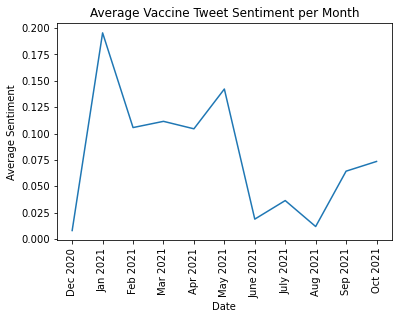

In [17]:
#looking at average over time
p = sns.lineplot(data=sentiments, x="month", y="avg_sentiment", markers = True)
p.set(xlabel='Date', ylabel='Average Sentiment')
p.set_title('Average Vaccine Tweet Sentiment per Month')
plt.xticks(rotation = 'vertical')

### Figure 1
First we categorized the data by month to demonstrate the distribution of vaccine tweets over time. Figure 1 tracks the sentiment of these tweets over the course of 11 months, December 2020 to October 2021. The average sentiment–the mean between negative, neutral, and positive associations–peaked in January, with smaller peaks in May, July, and September. The months in which sentiment was lowest are in the span between February to April and June to August. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

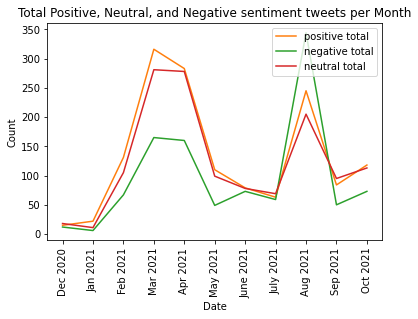

In [18]:
#looking at sentiment over time
temp = sentiments_alt[["month", "pos_total", 'neg_total', 'neu_total']]
temp
p = sns.lineplot(data = temp, x = 'month', markers = True)
p.set(xlabel='Date', ylabel='Count')
p.set_title('Total Positive, Neutral, and Negative sentiment tweets per Month')
sns.lineplot(data=temp['pos_total'], label = 'positive total', markers = True)
sns.lineplot(data=temp['neg_total'], label = 'negative total', markers = True)
sns.lineplot(data=temp['neu_total'], label = 'neutral total', markers = True)
plt.xticks(rotation = 'vertical')

### Figure 2
Our second graph demonstrates the total positive, neutral, and negative sentiment tweets per month. To determine the average sentiment of tweets regarding the vaccine, we used a pre-trained model which sifted through a large list of words to assign the tweet sentiment as positive, neutral, or negative. We then created ratios from this data by dividing the total number of positive/neutral/negative sentiment by the total number of words used in each tweet.

The graph shows a general increase in tweets regarding the vaccine from January to March 2021 with the greatest number of tweets having a positive total sentiment. Tweets with a neutral sentiment showed a similar increase during this time, while negative sentiment tweets increased to around 150 tweets per month. Tweets pertaining to the vaccine showed a significant decrease from April to May and continued to fall at a less significant rate until July. From July until August, there was a significant increase from around 50 tweets for each sentiment, to about 200 for neutral, 250 for positive, and around 350 or negative sentiment tweets. There was a dramatic decrease in all tweets pertaining to the vaccine fromAugust to September of 2021, and the most significant decrease was for negative sentiment tweets which dropped from 350 to around 50 tweets. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

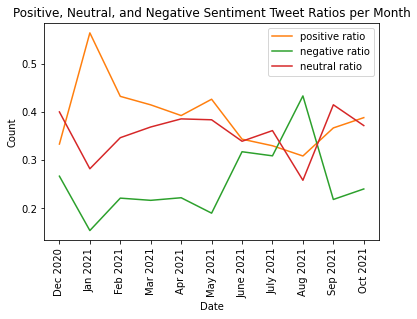

In [19]:
temp2 = sentiments_alt[["month", "pos_ratio", 'neg_ratio', 'neu_ratio']]
p = sns.lineplot(data = temp, x = 'month', markers = True)
p.set(xlabel='Date', ylabel='Count')
p.set_title('Positive, Neutral, and Negative Sentiment Tweet Ratios per Month')
sns.lineplot(data=temp2['pos_ratio'], label = 'positive ratio', markers = True)
sns.lineplot(data=temp2['neg_ratio'], label = 'negative ratio', markers = True)
sns.lineplot(data=temp2['neu_ratio'], label = 'neutral ratio', markers = True)
plt.xticks(rotation = 'vertical')

### Figure 3

Text(0.5, 1.0, 'Covid-19 Administered Vaccinations per Month')

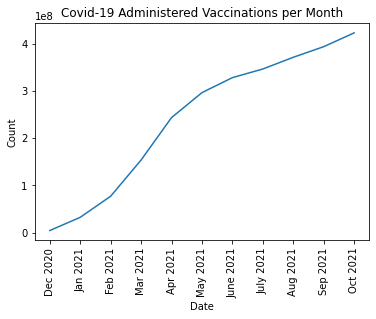

In [20]:
temp3 = cleaned_vaccine_rates[["Date", "Administered"]]

p = sns.lineplot(data = temp3, x = 'Date', y = "Administered")
plt.xticks(rotation = 'vertical')
p.set(xlabel='Date', ylabel='Count')
p.set_title('Covid-19 Administered Vaccinations per Month')

### Figure 4
This graph demonstrates the rate of administering the vaccine in California from December of 2020 to October of 2021. There was a steady increase in the rate of administration from December to February, which began to increase more rapidly until May of 2021. While the general trend continued to have an upward progression, the rate of administration began to slow from May until October 2021. 

Text(0.5, 1.0, 'Average Tweet Sentiments and Normalized Administration Rates')

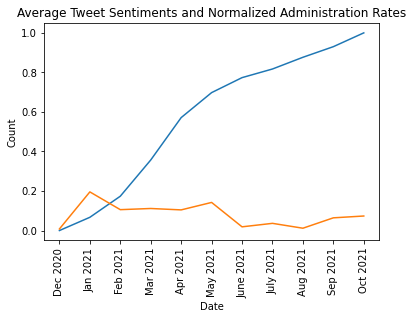

In [21]:
temp4 = normalized[["Date", "Administered"]]
p = sns.lineplot(data = temp4, x = 'Date', y = "Administered")
sns.lineplot(data=sentiments, x="month", y="avg_sentiment", markers = True)
plt.xticks(rotation = 'vertical')
p.set(xlabel='Date', ylabel='Count')
p.set_title('Average Tweet Sentiments and Normalized Administration Rates')

### Figure 5
Our next figure displays the temporal relationship between the normalized administration rate and the average tweet sentiments. Regardless of the minimal increases and decreases in tweets pertaining to the vaccine, the rate of administration progressively increased. Additionally, the tweet sentiments do not correlate with the increasing rate of administration. 

Text(0.5, 1.0, 'Positive, Neutral, and Negative sentiment Tweet Ratios and Vaccine Administrations per Month')

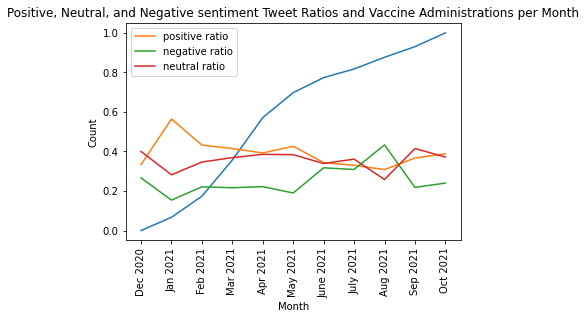

In [22]:
p = sns.lineplot(data = temp4, x = 'Date', y = "Administered")
sns.lineplot(data=temp2['pos_ratio'], label = 'positive ratio', markers = True)
sns.lineplot(data=temp2['neg_ratio'], label = 'negative ratio', markers = True)
sns.lineplot(data=temp2['neu_ratio'], label = 'neutral ratio', markers = True)
plt.xticks(rotation = 'vertical')
p.set(xlabel='Month', ylabel='Count')
p.set_title('Positive, Neutral, and Negative sentiment Tweet Ratios and Vaccine Administrations per Month')

### Figure 6
As the administration rate increases, the trend amongst positive, negative, and neutral ratios have varying behaviors. The positive sentiment slightly declines over time after peaking in the beginning months of January and February. The neutral sentiment remains at a consistent count of around 0.4. As for the negative sentiment, it has an upward trend over time, while dropping off in the last months of September and October. This graph points to the general sentiment dropping in positivity and increasing in negativity as the administration rate increases. 


<AxesSubplot:xlabel='Administered'>

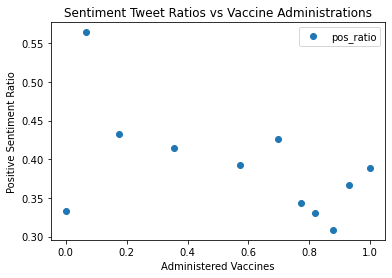

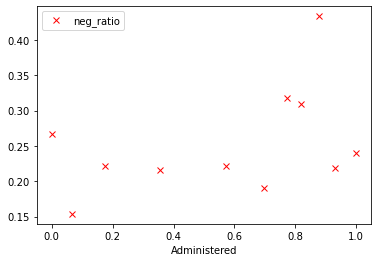

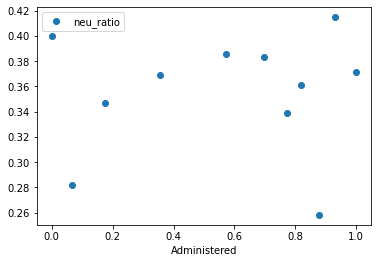

In [23]:
temp_2 = normalized[["Administered"]]
temp_3 = sentiments_alt[['pos_ratio', 'neu_ratio', 'neg_ratio']]
temp_3["Administered"] = normalized["Administered"]
temp_3
p = temp_3.plot(x='Administered', y='pos_ratio', style='o')
p.set(xlabel='Administered Vaccines', ylabel='Positive Sentiment Ratio')
p.set_title('Sentiment Tweet Ratios vs Vaccine Administrations')

temp_3.plot(x='Administered', y='neg_ratio', style='rx')
    
temp_3.plot(x='Administered', y='neu_ratio', style='o')

### Figure 7
Figure 7a. Our graph displaying the relationship between the positive sentiment ratio and administered vaccines shows a somewhat negative slope where smaller positive sentiment ratios indicated a great number of vaccines administered. There was an outlier for this data where the highest positive sentiment ratio of about 0.57 coincided with one of the lowest vaccine administration rates. 

Figure 7b. The data for the negative sentiment ratio against administered vaccines demonstrates a close to constant slope, where the negative sentiment ratio had a minimal effect on the rate of administration. There was a single outlier where the most negative sentiment ratio coincided with one of the highest administration rates.

Figure 7c. The neutral ratio trend also has a positive slope, although it is weak. The outliers include the high 0.4 value at the very start of the vaccine administration as well as the extremely low value of 0.26 toward the end of administration. 

Text(0.5, 1.0, 'Tweet Sentiment Ratios')

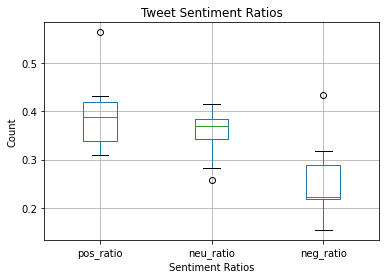

In [24]:
temp_3 = sentiments_alt[['pos_ratio', 'neu_ratio', 'neg_ratio']]
p = temp_3.boxplot()
p.set(xlabel='Sentiment Ratios', ylabel='Count')
p.set_title('Tweet Sentiment Ratios')

### Figure 8
Our last graph displays that the positive ratio for sentiment tweets had the smallest range, a greater range for the neutral ratio, and the largest range for the negative ratio. The average count for the positive ratio was 0.38, 0.36 for neutral, and 0.23 for the negative ratio. Each of the three ratios had one noteworthy outlier outside of the range, where the values were significantly higher than the range for the positive and negative ratios, and somewhat below the range for the neutral value. 


Since the release of the vaccine in December of 2020, there has been a noteworthy increase in tweets pertaining to the vaccine. When it comes to the magnitude of tweets, the positive and neutral sentiment was much larger than the negative sentiment. However, as time progressed the number of negative sentiment tweets increased and surpassed that of neutral and positive sentiment tweets. This relationship could be due to the fact that when the vaccine was originally released, Americans were very eager to feel protected against the virus as the lack of research and methods for protection instilled fear in a large population. However as time progressed, side effects due to the vaccine began to emerge and this was reflected through social media. This caused greater controversy surrounding the safety of the vaccine which led to an increase in negative sentiment tweets, and those opposing them as well. 

# Statistical Analysis: Regression

Before we did our regression analysis, we wanted to look at the correlations between our variables to determine which ones to use in our regression analysis. Our correlation test showed that most of our variables had high correlations, except for the ratio of positive sentiment among our tweets. Because of this, we had to exclude most of our variables from our analysis. Once we dropped all our other variables, we can see that the ratio of positive sentiment and the number of vaccines administered have a negative correlation. 

We then carried out an Ordinary Least Squares regression on our variables, which showed that the ratio of positive sentiment did not have a significant effect on the rate at which vaccines were administered. Additionally, this model only accounts for 26% of the variation in the dependent variable. We can retain the null hypothesis.

In [32]:
#want to look at how positive tweet ratio changes due to independent variables. 
#temp = sentiments_alt[["month", "pos_total", 'neg_total', 'neu_total']]
#sentiments_alt
#normalized
new = normalized.join(sentiments_alt['pos_ratio'], how='outer')
first_column = new.pop('Date')
new.insert(0, 'Date', first_column)
new
new2 = new.drop(['Date'], axis=1)
new2.corr()
#Did not want to exclude so many variables but after running a coorrelation test we can see that distributed, administered, series complete, and administered dose 1 all are highly correlated, so we have to exclude them from our regression model

,Distributed,Administered,Administered_Dose1_Recip,Series_Complete_Yes,pos_ratio
Distributed,1.000000,0.998365,0.992828,0.989767,-0.492580
Administered,0.998365,1.000000,0.993476,0.993040,-0.511710
Administered_Dose1_Recip,0.992828,0.993476,1.000000,0.982551,-0.544834
Series_Complete_Yes,0.989767,0.993040,0.982551,1.000000,-0.549490
pos_ratio,-0.492580,-0.511710,-0.544834,-0.549490,1.000000


In [26]:
#dropping all variables except pos_ratio and Administered
new2 = new2.drop(['Distributed', 'Administered_Dose1_Recip', 'Series_Complete_Yes'], axis = 1)
new2
new2.corr()
#we see that there is a negative correlation


,Administered,pos_ratio
Administered,1.00000,-0.51171
pos_ratio,-0.51171,1.00000


In [27]:
#model
outcome, predictors = patsy.dmatrices('pos_ratio ~ Administered', new)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              pos_ratio   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     3.193
Date:                Fri, 10 Dec 2021   Prob (F-statistic):              0.108
Time:                        12:24:20   Log-Likelihood:                 15.704
No. Observations:                  11   AIC:                            -27.41
Df Residuals:                       9   BIC:                            -26.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4480      0.037     11.995   

As we can see, the results of our regression model indicate non significant effects of Administration on Positive Tweet Numbers. Additionally, this model only accounts for 26% of the variation in the dependent variable. We can retain the null hypothesis. Below is a graph displaying no linear relationship between variables. 

(0.0, 1.0)

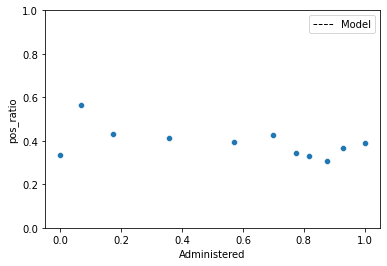

In [28]:
## Plot 
sns.scatterplot(x='Administered', y='pos_ratio', data=new);

# Generate and plot the model fit line learned from class
xs = np.arange(new['Administered'].min(), new['Administered'].max())
ys = 1.9292 * xs + 16.7423
plt.plot(xs, ys, '--k', linewidth=1, label='Model')
plt.xlabel('Administered')
plt.ylabel('pos_ratio')
plt.legend();
plt.ylim(0.0, 1.0)

There is no visible correlation between administered vaccination rates and positive vaccine sentiment, however there was a non significant negative correlation. If we plot just the administration rates and positive tweet ratios then we observe that the peak of positive tweets is when administration rates were very low

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

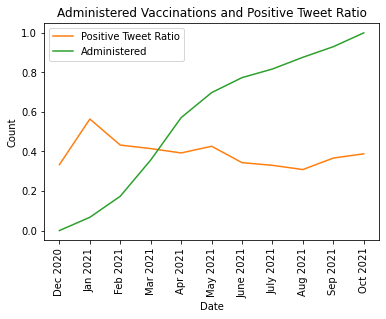

In [29]:
p = sns.lineplot(data = new, x = 'Date', markers = True)
p.set(xlabel='Date', ylabel='Count')
p.set_title('Administered Vaccinations and Positive Tweet Ratio')
sns.lineplot(data=new['pos_ratio'], label = 'Positive Tweet Ratio', markers = True)
sns.lineplot(data=new['Administered'], label = 'Administered', markers = True)
plt.xticks(rotation = 'vertical')

# Ethics and Privacy 

No dataset is without biases. The most obvious one comes from how we got our Tweets. The tweets were gathered by a third party and posted to Kaggle, so we have no way to know how or what criteria was used to gather the tweets. Also, our tweets only take into account sentiment from when the vaccine became available, and not any prior sentiment, which could have influenced people's decision to get the vaccine. In this project, we aimed to minimize privacy risks and concerns. Despite the tweets being public information and posted to public twitter accounts, we still omitted all names, usernames, and any other identifying information from our final dataset. All our other data is public information from the CDC, which has no identifying information included in it. 

Due to the fact that the pandemic is a current event that has sparked major controversy, particularly regarding mask mandates and vaccine requirements, there are sensitivities that surround discussing it. Our data will thus maintain a level of anonymity and be entirely based on logistical data collection. Data analysis will be conducted on cleaned data that generalizes the overall sentiment towards the COVID vaccine for the United States as a whole to protect the integrity of twitter users who tweeted about the vaccine and ensure no state is ostracized or shunned based on their tweet sentiment. We consistently made efforts to eliminate our own biases surrounding this subject matter through using objective language, facts and evidence, and by consulting our fellow team members to ensure we uphold this standard. 

Because we referred to existing data sets rather than cultivating our own, there is of course the potential for hidden biases within the data collection methods and the potential that those who extracted the data, framed it in such a manner to adhere to a particular side of the argument (depending on their own vaccination stance). There is a strong chance that particular groups may be omitted from the data, due to undetectable methods. For example, affluent and populations of higher socioeconomic status may have higher reports of vaccination due to more access to such resources. There is additionally a strong chance that impoverished districts may report lower vaccine numbers solely due to the lack of resources rather than a stance on whether or not they’d like to receive the vaccine if the opportunity was presented. There is also a bias present on the sentiment analysis of tweets, as there may not be a uniform distribution of people with a given age, gender, race, ethnicity, and political affiliation that tweet about the COVID vaccine.


# Conclusion
The purpose of this project was to look for evidence that sentiment towards the various COVID-19 vaccines in social media, specifically Twitter, affected the rates at which vaccines were administered to people. To look for this we found a dataset of tweets regarding the COVID vaccine, and the official CDC vaccination dataset, and carried out a multivariate regression analysis. Before carrying out our analysis, we hypothesized that an overall positive twitter sentiment for a period of time would lead to an increase in the rate at which vaccines were administered. 

The results of our multivariate analysis showed that there was no significant relationship between our two variables, which refuted our hypothesis. Additionally, we found a negative correlation between our two main variables, the ratio of positive sentiment and the change in administered vaccines. 

As a whole, the scope of our project was limited. The dataset we found for our tweets after cleaning only had around 4000 observations, and we don’t know how the data was compiled. If we could go back and do this project again, we would have made use of the twitter API, and searched for tweets regarding the covid vaccine ourselves, which could have yielded more or better data. Given more time and more data, we could have looked at individual states or even individual counties across the US, which may have given us some more insight into how social media from those specific areas reflect those areas vaccination rates. 

We also must acknowledge that despite social media's ever growing influence, vaccination rates are affected by a lot more than just social media, for example: religion, political stance, ethnic/cultural background, and level of education. Therefore it's possible that twitter sentiment does not take precedence as a determining factor of whether or not someone decides to get vaccinated.


# Team Contributions
All of our meetings were either in person or over discord. We did most of the work collaboratively during meetings, but in the instances where we could not meet all team members completed the roles and sections they were assigned in a timely manner. 